In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente2/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

13931

In [6]:
with open('dataset/generado/paciente2/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

13931

In [8]:
with open('dataset/generado/paciente2/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

1741

In [10]:
with open('dataset/generado/paciente2/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

1741

In [12]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

1742

In [14]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

1742

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/vanilla_dropout.h5')

Epoch 1/50
436/436 [==============================] - 13s 22ms/step - loss: 0.0086 - mae: 0.0662 - mse: 0.0086 - val_loss: 0.0040 - val_mae: 0.0508 - val_mse: 0.0040
Epoch 2/50
436/436 [==============================] - 10s 24ms/step - loss: 0.0042 - mae: 0.0475 - mse: 0.0042 - val_loss: 0.0031 - val_mae: 0.0446 - val_mse: 0.0031
Epoch 3/50
436/436 [==============================] - 10s 22ms/step - loss: 0.0032 - mae: 0.0407 - mse: 0.0032 - val_loss: 0.0023 - val_mae: 0.0392 - val_mse: 0.0023
Epoch 4/50
436/436 [==============================] - 9s 20ms/step - loss: 0.0025 - mae: 0.0357 - mse: 0.0025 - val_loss: 0.0020 - val_mae: 0.0354 - val_mse: 0.0020
Epoch 5/50
436/436 [==============================] - 11s 26ms/step - loss: 0.0020 - mae: 0.0324 - mse: 0.0020 - val_loss: 0.0018 - val_mae: 0.0334 - val_mse: 0.0018
Epoch 6/50
436/436 [==============================] - 8s 19ms/step - loss: 0.0018 - mae: 0.0303 - mse: 0.0018 - val_loss: 0.0017 - val_mae: 0.0324 - val_mse: 0.0017
Epoch 

55/55 [==============================] - 0s 7ms/step - loss: 0.0016 - mae: 0.0315 - mse: 0.0016
test loss, test acc: [0.001643352909013629, 0.03153467923402786, 0.001643352909013629]


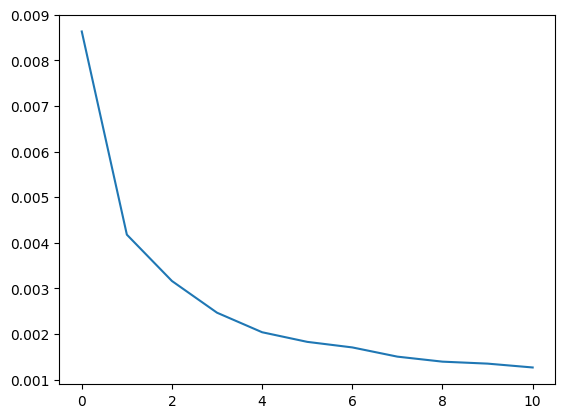

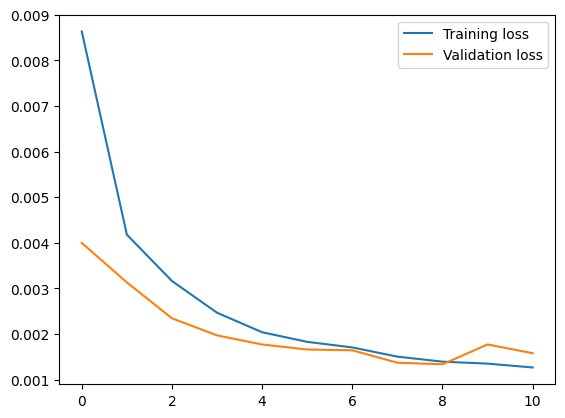

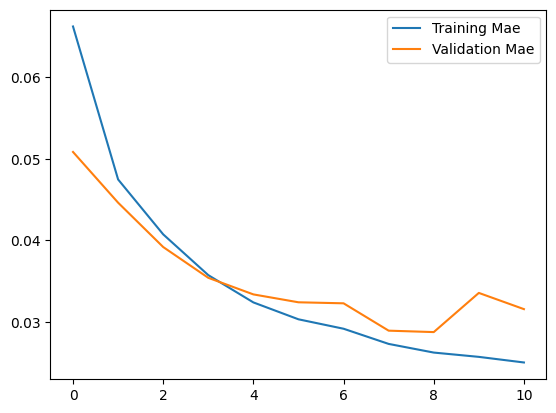

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 7ms/step


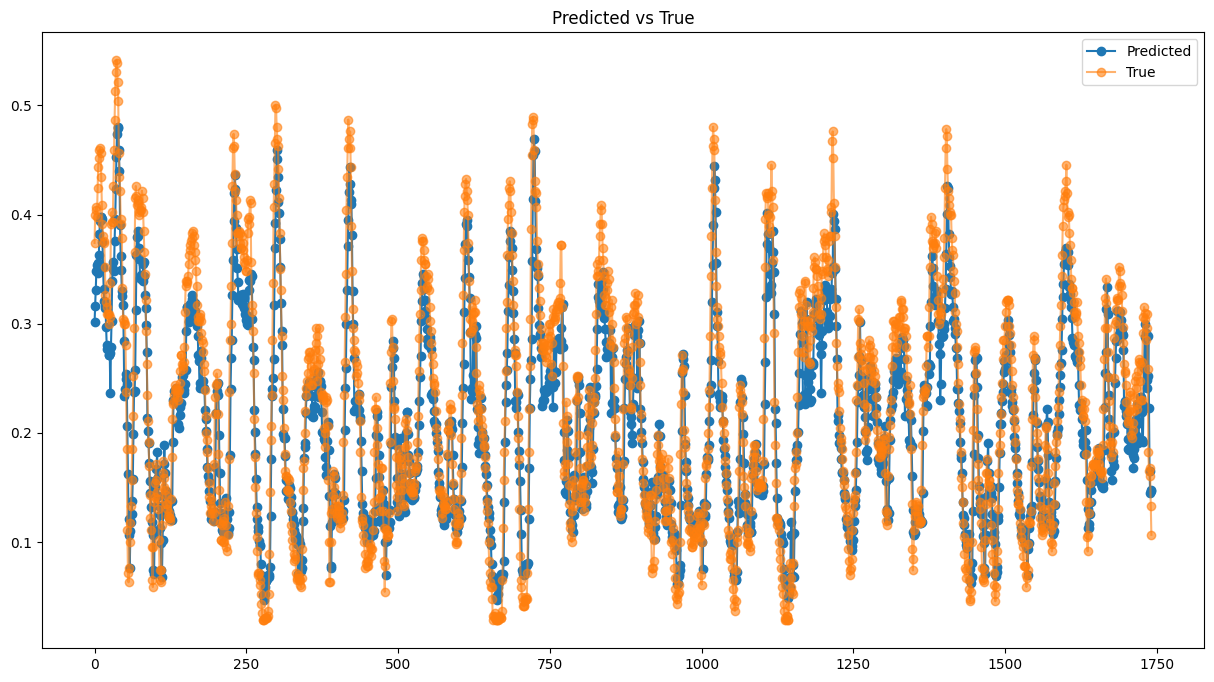

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03153467998152817,
 'mse': 0.04053829141756145,
 'rmse': 0.0016433530710551363}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/vanilla_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 13s 24ms/step - loss: 0.0049 - mae: 0.0477 - mse: 0.0049 - val_loss: 0.0043 - val_mae: 0.0535 - val_mse: 0.0043
Epoch 2/50
436/436 [==============================] - 7s 16ms/step - loss: 0.0019 - mae: 0.0307 - mse: 0.0019 - val_loss: 0.0019 - val_mae: 0.0341 - val_mse: 0.0019
Epoch 3/50
436/436 [==============================] - 10s 23ms/step - loss: 0.0014 - mae: 0.0265 - mse: 0.0014 - val_loss: 0.0016 - val_mae: 0.0305 - val_mse: 0.0016
Epoch 4/50
436/436 [==============================] - 7s 16ms/step - loss: 0.0012 - mae: 0.0242 - mse: 0.0012 - val_loss: 0.0014 - val_mae: 0.0287 - val_mse: 0.0014
Epoch 5/50
436/436 [==============================] - 9s 20ms/step - loss: 0.0010 - mae: 0.0225 - mse: 0.0010 - val_loss: 0.0013 - val_mae: 0.0271 - val_mse: 0.0013
Epoch 6/50
436/436 [==============================] - 7s 16ms/step - loss: 9.4497e-04 - mae: 0.0213 - mse: 9.4497e-04 - val_loss: 0.0012 - val_mae: 0.0259 - val_mse: 0.0012


55/55 [==============================] - 1s 10ms/step - loss: 8.1658e-04 - mae: 0.0211 - mse: 8.1658e-04
test loss, test acc: [0.0008165825856849551, 0.0210618507117033, 0.0008165825856849551]


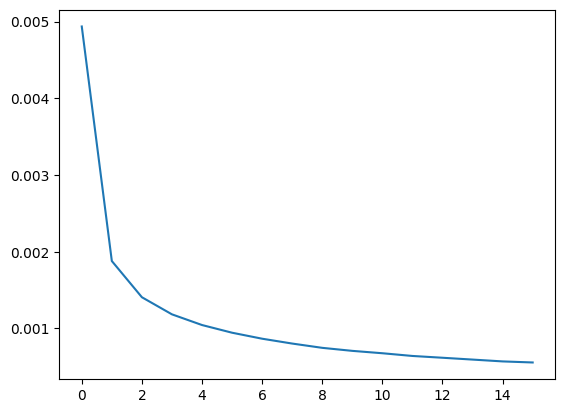

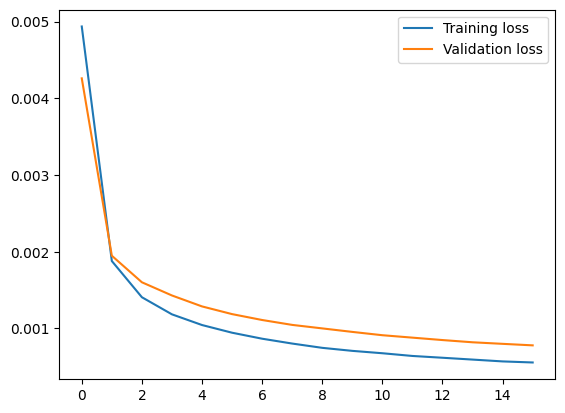

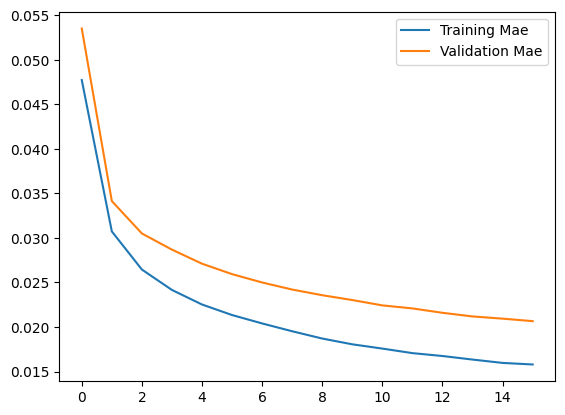

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 8ms/step


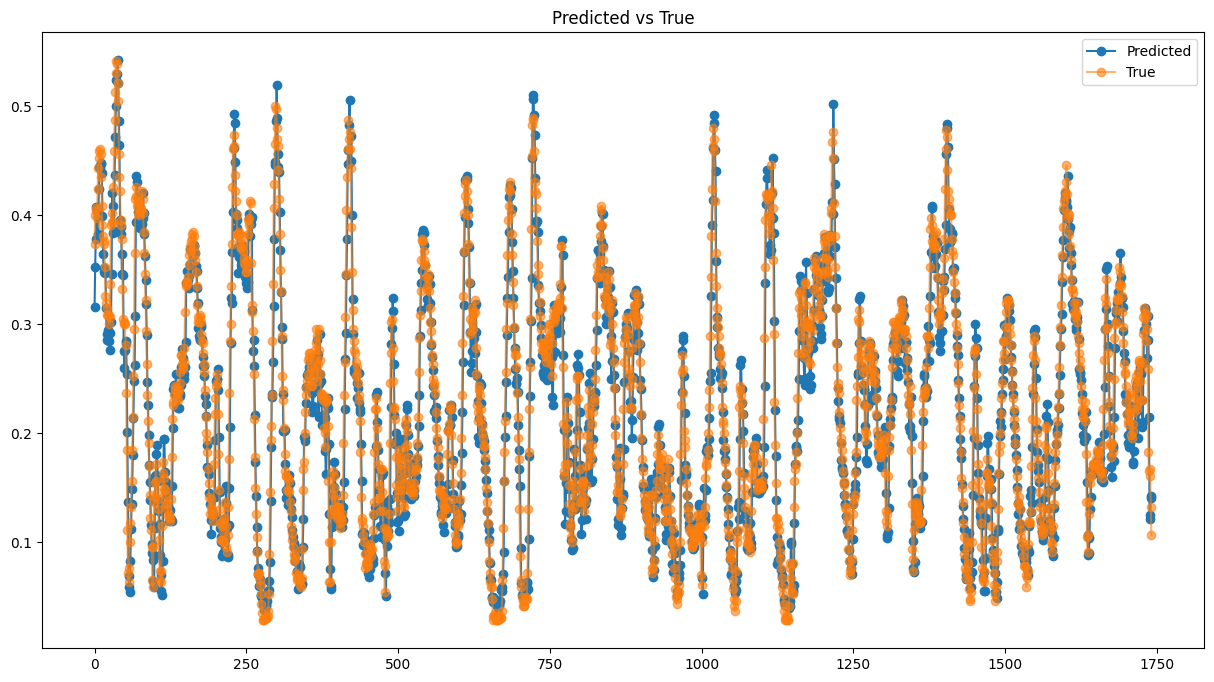

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02106184889299995,
 'mse': 0.0285759111528605,
 'rmse': 0.0008165826982161772}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/stacked_dropout.h5')

Epoch 1/50
436/436 [==============================] - 30s 48ms/step - loss: 0.0083 - mae: 0.0646 - mse: 0.0083 - val_loss: 0.0057 - val_mae: 0.0617 - val_mse: 0.0057
Epoch 2/50
436/436 [==============================] - 19s 44ms/step - loss: 0.0044 - mae: 0.0482 - mse: 0.0044 - val_loss: 0.0044 - val_mae: 0.0547 - val_mse: 0.0044
Epoch 3/50
436/436 [==============================] - 16s 37ms/step - loss: 0.0033 - mae: 0.0421 - mse: 0.0033 - val_loss: 0.0032 - val_mae: 0.0460 - val_mse: 0.0032
Epoch 4/50
436/436 [==============================] - 21s 48ms/step - loss: 0.0025 - mae: 0.0359 - mse: 0.0025 - val_loss: 0.0023 - val_mae: 0.0382 - val_mse: 0.0023
Epoch 5/50
436/436 [==============================] - 31s 71ms/step - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 - val_loss: 0.0016 - val_mae: 0.0319 - val_mse: 0.0016
Epoch 6/50
436/436 [==============================] - 26s 60ms/step - loss: 0.0017 - mae: 0.0291 - mse: 0.0017 - val_loss: 0.0014 - val_mae: 0.0298 - val_mse: 0.0014
Epoc

55/55 [==============================] - 1s 16ms/step - loss: 0.0013 - mae: 0.0280 - mse: 0.0013
test loss, test acc: [0.001259288052096963, 0.027992872521281242, 0.001259288052096963]


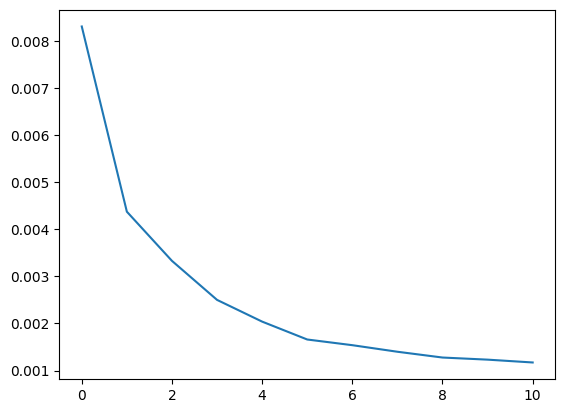

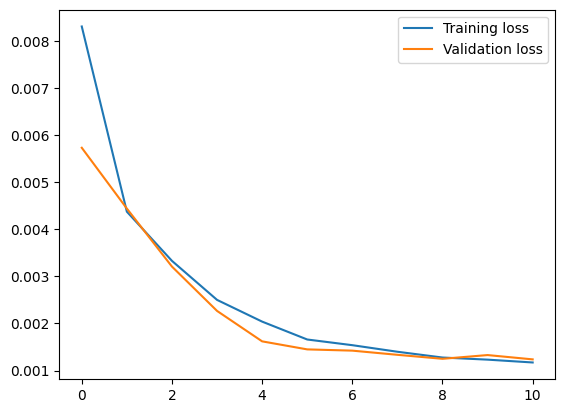

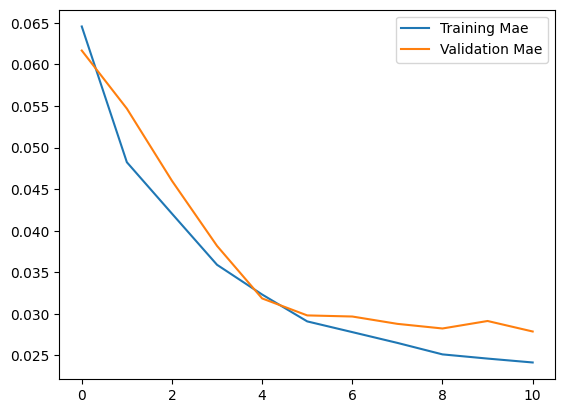

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 15ms/step


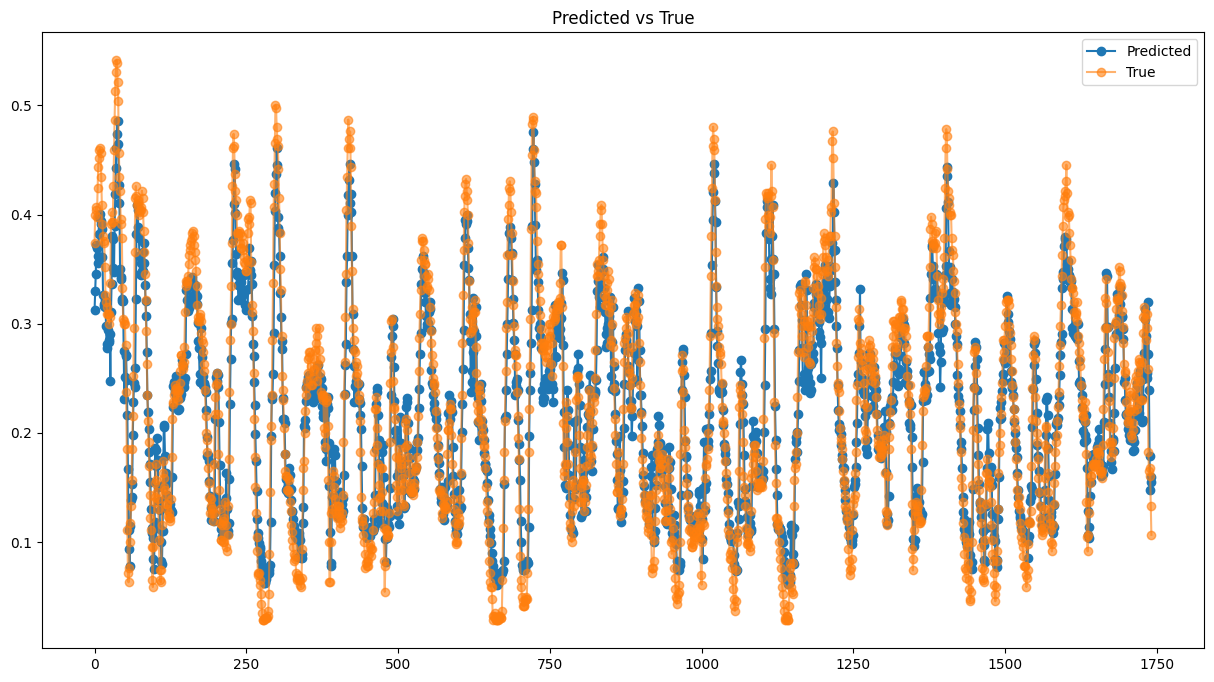

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.027992869889180386,
 'mse': 0.03548644884334554,
 'rmse': 0.0012592880515113803}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/stacked_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 29s 44ms/step - loss: 0.0061 - mae: 0.0535 - mse: 0.0061 - val_loss: 0.0060 - val_mae: 0.0638 - val_mse: 0.0060
Epoch 2/50
436/436 [==============================] - 19s 43ms/step - loss: 0.0031 - mae: 0.0396 - mse: 0.0031 - val_loss: 0.0050 - val_mae: 0.0585 - val_mse: 0.0050
Epoch 3/50
436/436 [==============================] - 18s 40ms/step - loss: 0.0023 - mae: 0.0339 - mse: 0.0023 - val_loss: 0.0032 - val_mae: 0.0462 - val_mse: 0.0032
Epoch 4/50
436/436 [==============================] - 18s 42ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0019 - val_mae: 0.0343 - val_mse: 0.0019
Epoch 5/50
436/436 [==============================] - 19s 43ms/step - loss: 0.0013 - mae: 0.0254 - mse: 0.0013 - val_loss: 0.0016 - val_mae: 0.0308 - val_mse: 0.0016
Epoch 6/50
436/436 [==============================] - 19s 43ms/step - loss: 0.0011 - mae: 0.0236 - mse: 0.0011 - val_loss: 0.0014 - val_mae: 0.0286 - val_mse: 0.0014
Epoc

55/55 [==============================] - 1s 18ms/step - loss: 6.8814e-04 - mae: 0.0193 - mse: 6.8814e-04
test loss, test acc: [0.00068814487894997, 0.01925872452557087, 0.00068814487894997]


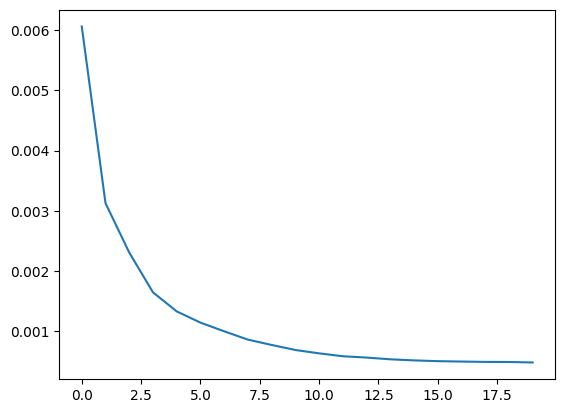

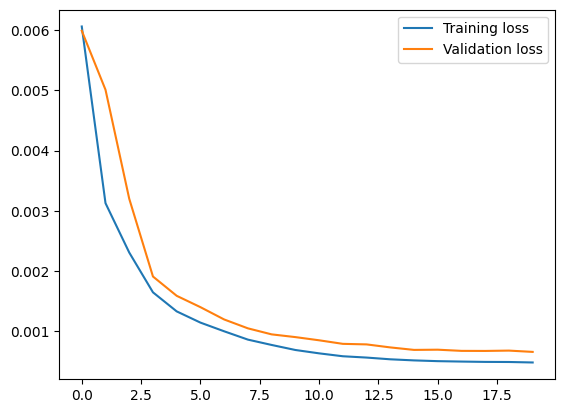

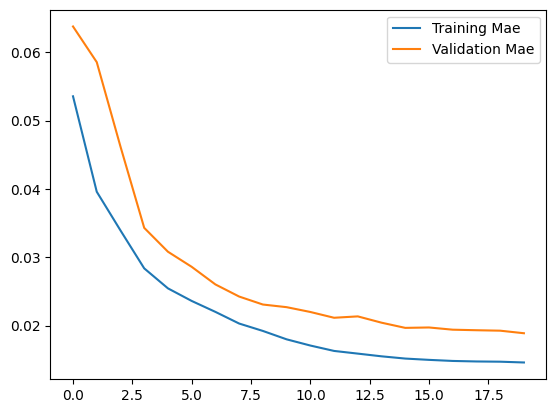

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 17ms/step


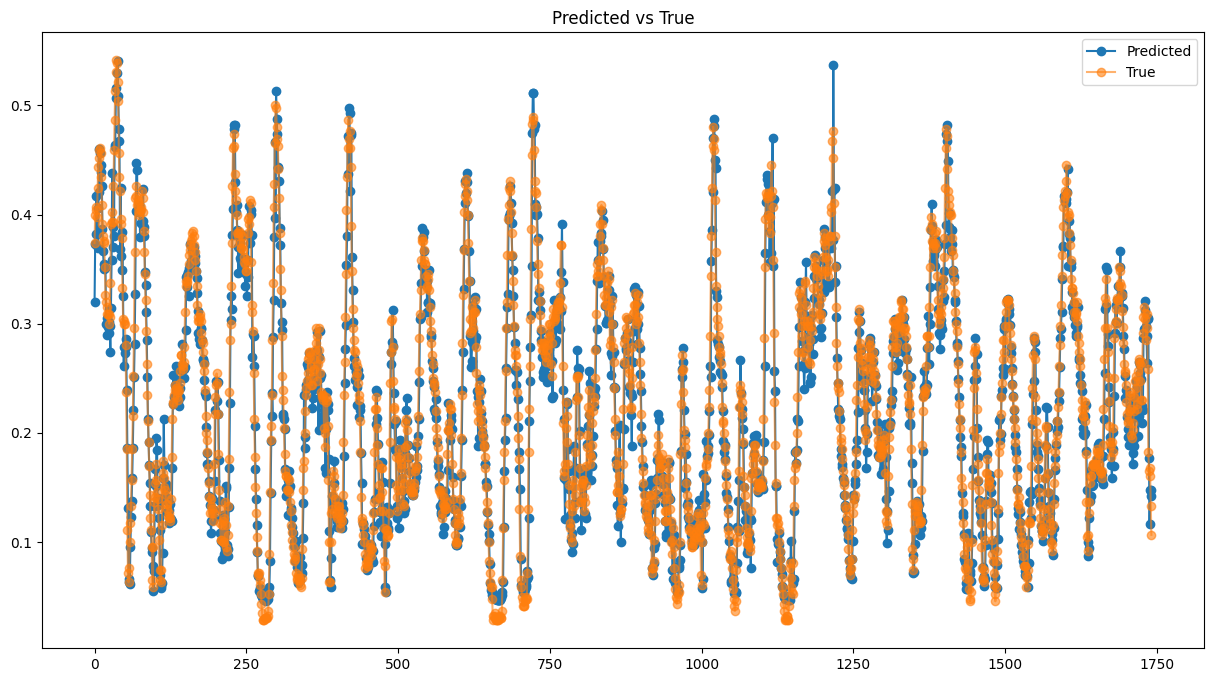

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.019258726292633768,
 'mse': 0.026232516040789088,
 'rmse': 0.0006881448978302568}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/bidirectional_dropout.h5')

Epoch 1/50
436/436 [==============================] - 28s 38ms/step - loss: 0.0068 - mae: 0.0607 - mse: 0.0068 - val_loss: 0.0037 - val_mae: 0.0490 - val_mse: 0.0037
Epoch 2/50
436/436 [==============================] - 14s 32ms/step - loss: 0.0042 - mae: 0.0479 - mse: 0.0042 - val_loss: 0.0030 - val_mae: 0.0443 - val_mse: 0.0030
Epoch 3/50
436/436 [==============================] - 14s 31ms/step - loss: 0.0030 - mae: 0.0403 - mse: 0.0030 - val_loss: 0.0021 - val_mae: 0.0375 - val_mse: 0.0021
Epoch 4/50
436/436 [==============================] - 13s 30ms/step - loss: 0.0025 - mae: 0.0363 - mse: 0.0025 - val_loss: 0.0022 - val_mae: 0.0385 - val_mse: 0.0022
Epoch 5/50
436/436 [==============================] - 14s 31ms/step - loss: 0.0021 - mae: 0.0328 - mse: 0.0021 - val_loss: 0.0015 - val_mae: 0.0307 - val_mse: 0.0015
Epoch 6/50
436/436 [==============================] - 15s 34ms/step - loss: 0.0018 - mae: 0.0304 - mse: 0.0018 - val_loss: 0.0016 - val_mae: 0.0316 - val_mse: 0.0016
Epoc

55/55 [==============================] - 1s 12ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013
test loss, test acc: [0.0012980502797290683, 0.027847260236740112, 0.0012980502797290683]


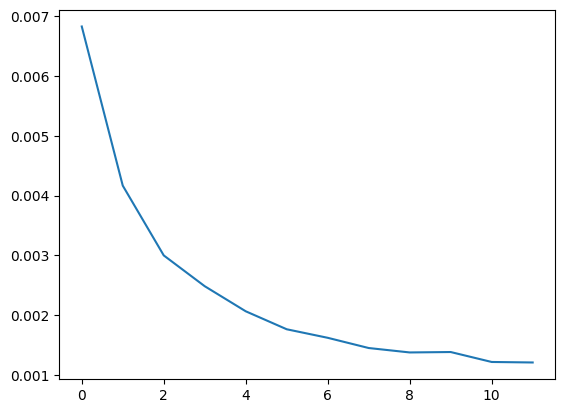

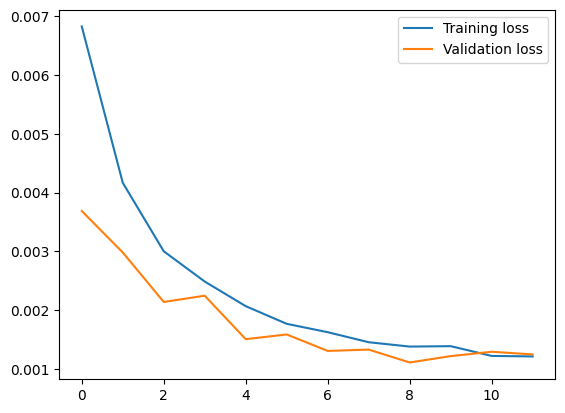

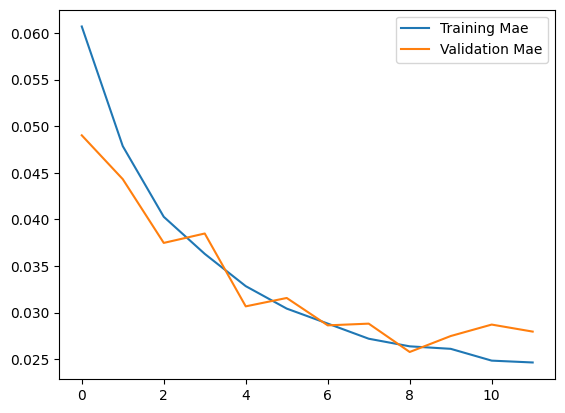

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 10ms/step


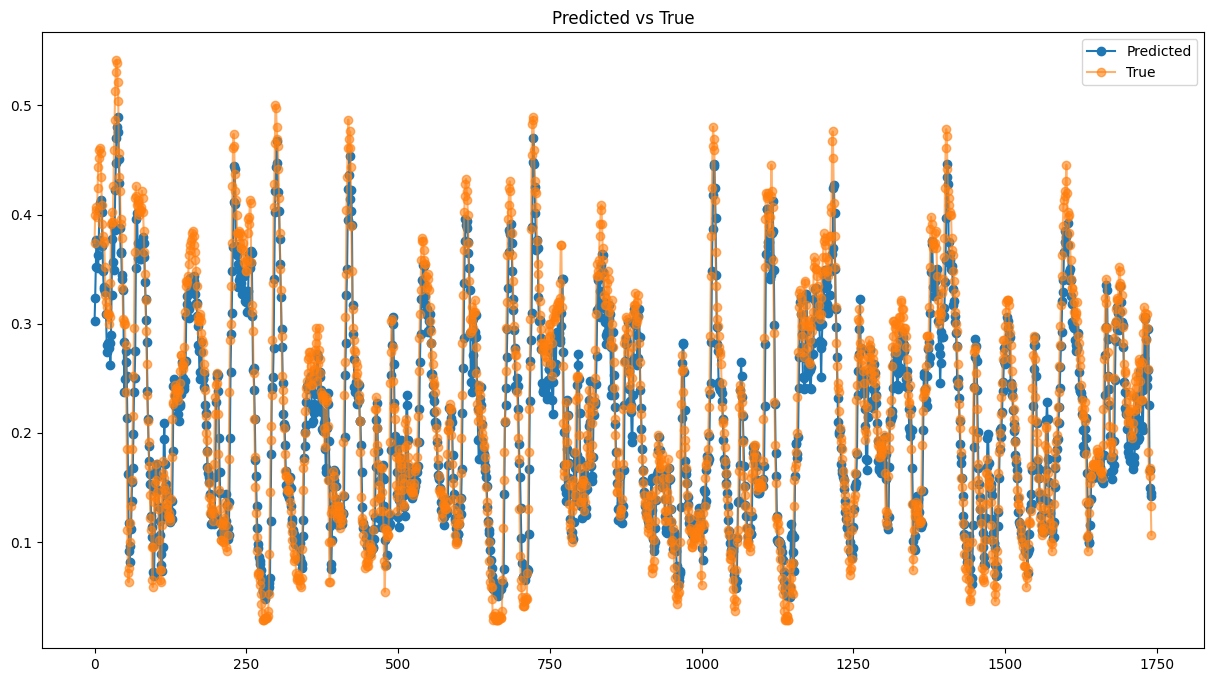

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.027847257161927316,
 'mse': 0.036028461792967,
 'rmse': 0.0012980500591672829}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/bidirectional_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 22s 32ms/step - loss: 0.0059 - mae: 0.0527 - mse: 0.0059 - val_loss: 0.0059 - val_mae: 0.0637 - val_mse: 0.0059
Epoch 2/50
436/436 [==============================] - 14s 31ms/step - loss: 0.0026 - mae: 0.0365 - mse: 0.0026 - val_loss: 0.0039 - val_mae: 0.0510 - val_mse: 0.0039
Epoch 3/50
436/436 [==============================] - 12s 27ms/step - loss: 0.0016 - mae: 0.0283 - mse: 0.0016 - val_loss: 0.0018 - val_mae: 0.0334 - val_mse: 0.0018
Epoch 4/50
436/436 [==============================] - 11s 26ms/step - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - val_loss: 0.0014 - val_mae: 0.0291 - val_mse: 0.0014
Epoch 5/50
436/436 [==============================] - 12s 28ms/step - loss: 0.0010 - mae: 0.0226 - mse: 0.0010 - val_loss: 0.0013 - val_mae: 0.0273 - val_mse: 0.0013
Epoch 6/50
436/436 [==============================] - 12s 28ms/step - loss: 9.2342e-04 - mae: 0.0211 - mse: 9.2342e-04 - val_loss: 0.0012 - val_mae: 0.0257 - val_mse: 0.0

55/55 [==============================] - 1s 12ms/step - loss: 7.5774e-04 - mae: 0.0207 - mse: 7.5774e-04
test loss, test acc: [0.0007577394717372954, 0.02071022428572178, 0.0007577394717372954]


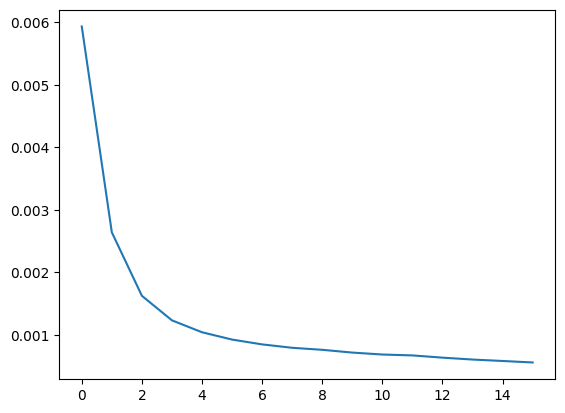

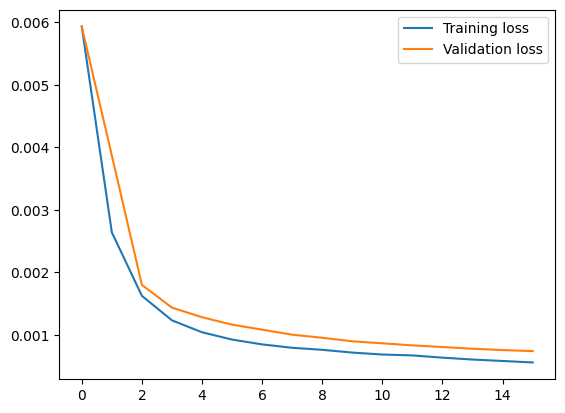

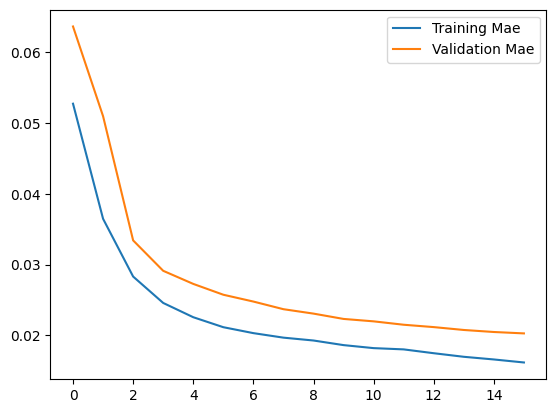

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 10ms/step


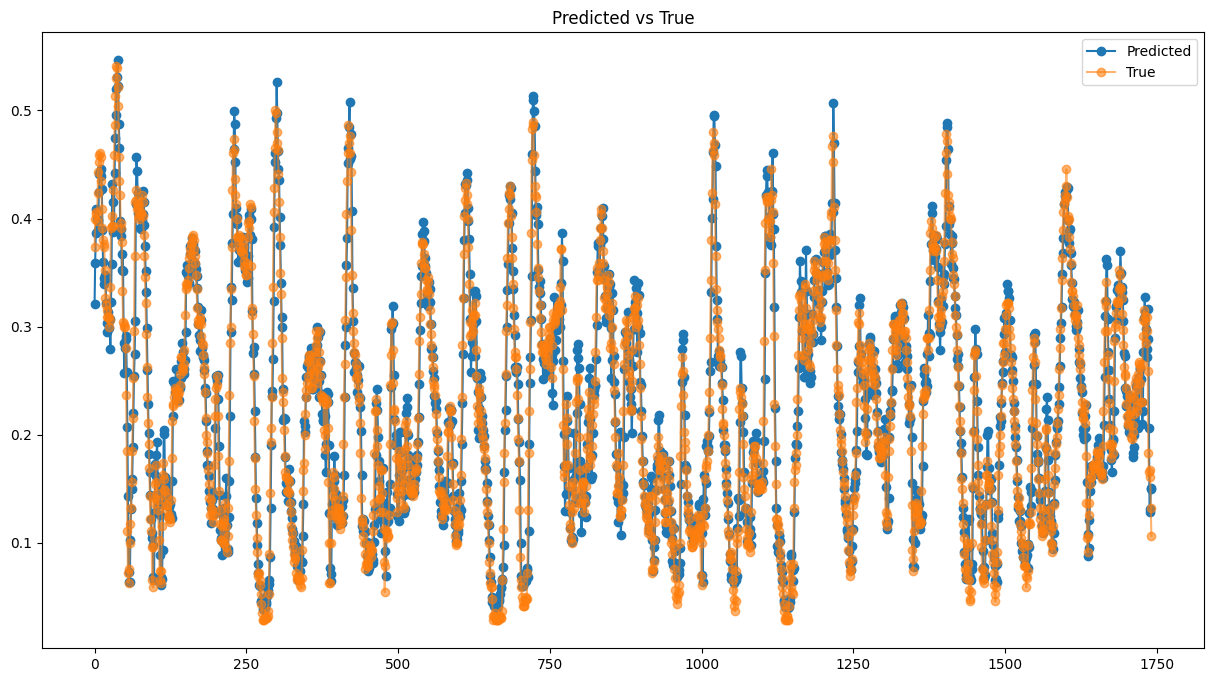

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02071022617752509,
 'mse': 0.027527065048230877,
 'rmse': 0.000757739310169534}